<a href="https://colab.research.google.com/github/francescopatane96/Computer_aided_drug_discovery_kit/blob/main/10_binding_site_similarity_off_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

binding site comparison , geometrical variation (RMSD)

In [ ]:
pip install rdkit nglview redo pypdb biotite

In [ ]:
#!pip install https://github.com/volkamerlab/opencadd/archive/master.tar.gz

In [ ]:
pip install git+https://github.com/volkamerlab/opencadd

In [ ]:
pip install mdanalysis

In [ ]:
import logging
from pathlib import Path
import random
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import redo
import nglview as nv
import pypdb
import biotite.database.rcsb as rcsb
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from MDAnalysis.analysis import rms
from opencadd.structure.core import Structure
from opencadd.structure.superposition.api import align, METHODS
from opencadd.structure.superposition.engines.mda import MDAnalysisAligner



In [ ]:
# Frozen set of PDB IDs that will be used in this notebook
# TODO check in the future if we want to update this dataset
FROZEN_PDB_IDS = ["3HEC", "2PL0", "4CSV", "4R7I", "1XBB", "3FW1", "1T46"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


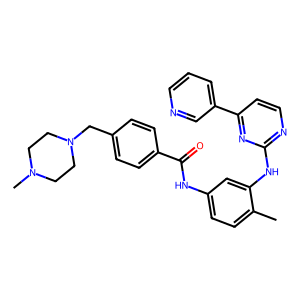

In [ ]:
smiles = Chem.MolFromSmiles("CN1CCN(Cc2ccc(cc2)C(=O)Nc2ccc(C)c(Nc3nccc(n3)-c3cccnc3)c2)CC1")
Draw.MolToImage(smiles)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


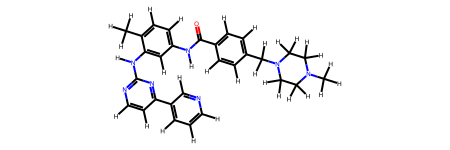

In [ ]:
molecule = Chem.AddHs(smiles)
molecule

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


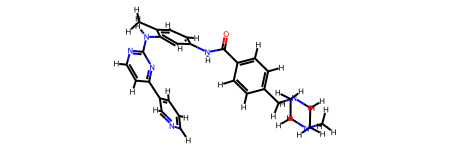

In [ ]:
AllChem.EmbedMolecule(molecule)
AllChem.UFFOptimizeMolecule(molecule)
molecule

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
view = nv.show_rdkit(molecule)
view

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NGLWidget()

In [ ]:
view.render_image(trim=True, factor=2, transparent=True);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
view._display_image()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
query_by_ligand_id = rcsb.FieldQuery(
    "rcsb_nonpolymer_entity_container_identifiers.nonpolymer_comp_id", exact_match="STI"
)
print(f"Number of matches: {rcsb.count(query_by_ligand_id)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of matches: 28


In [ ]:
query_by_experimental_method = rcsb.FieldQuery("exptl.method", exact_match="X-RAY DIFFRACTION")
print(f"Number of matches: {rcsb.count(query_by_experimental_method)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of matches: 177521


In [ ]:
query_by_resolution = rcsb.FieldQuery("rcsb_entry_info.resolution_combined", less_or_equal=3.0)
print(f"Number of matches: {rcsb.count(query_by_resolution)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of matches: 170190


In [ ]:
query_by_polymer_count = rcsb.FieldQuery(
    "rcsb_entry_info.deposited_polymer_entity_instance_count", equals=1
)
print(f"Number of matches: {rcsb.count(query_by_polymer_count)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of matches: 75451


In [ ]:
query = rcsb.CompositeQuery(
    [
        query_by_ligand_id,
        query_by_experimental_method,
        query_by_resolution,
        query_by_polymer_count,
    ],
    "and",
)
pdb_ids = rcsb.search(query)
print(f"Number of matches: {len(pdb_ids)}")
print("Selected PDB IDs:")
print(*pdb_ids)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of matches: 9
Selected PDB IDs:
1T46 1XBB 2PL0 3FW1 3GVU 3HEC 4CSV 4R7I 6JOL


In [ ]:
pdb_ids = FROZEN_PDB_IDS
print("Final set of PDB IDs:")
print(*pdb_ids)

Final set of PDB IDs:
3HEC 2PL0 4CSV 4R7I 1XBB 3FW1 1T46


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
view = nv.NGLWidget()
for pdb_id in pdb_ids:
    view.add_pdbid(pdb_id)
view

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NGLWidget()

In [ ]:
view.render_image(trim=True, factor=2, transparent=True);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
view._display_image()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Download PDB
structures = [Structure.from_pdbid(pdb_id) for pdb_id in pdb_ids]
# Strip solvent and other artifacts of crystallography
proteins = [Structure.from_atomgroup(s.select_atoms("protein")) for s in structures]
# Align proteins
results = align(proteins, method=METHODS["mda"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored